# Tutorial

This is a tutorial on how to use the Julia package [CubicHermiteSpline.jl](https://github.com/liuyxpp/CubicHermiteSpline.jl), which performs a [cubic Hermite spline interpolation](https://en.wikipedia.org/wiki/Cubic_Hermite_spline) on an array of data points, $(x_i, y_i)$, given that their associated gradients at each point, $k_i$, are known in advance.

In [1]:
using CubicHermiteSpline
import Plots
using Plots: plot, plot!
using LaTeXStrings

In [2]:
Plots.default(size=(600, 370))
fntf = :Helvetica
titlefont = Plots.font(fntf, pointsize=12)
guidefont = Plots.font(fntf, pointsize=12)
tickfont = Plots.font(fntf, pointsize=9)
legendfont = Plots.font(fntf, pointsize=8)
Plots.default(fontfamily=fntf)
Plots.default(titlefont=titlefont, guidefont=guidefont, tickfont=tickfont, legendfont=legendfont)
Plots.default(minorticks=true)
Plots.default(linewidth=1.2)
Plots.default(foreground_color_legend=nothing)
Plots.default(legend=false)

## Cubic polynomial

The cubic polynomial of the form
$$
    f(x) = ax^3 + bx^2 + cx + d
$$
should be exactly interpolated by the cubic Hermite spline interpolation.

Below we use CubicHermiteSpline.jl to demonstrate it indeed is the case. First we define a typical cubic polynomial:

In [22]:
f(x) = x^3 - 3x^2 + 2x - 5;

Its gradient can be computed analytically as

In [23]:
df(x) = 3x^2 - 6x + 2;

The cubic polynomial is plotted.

In [24]:
a = 0.0
b = 2.5
x_exact = range(a, b, step=0.01);
y_exact = f.(x_exact);

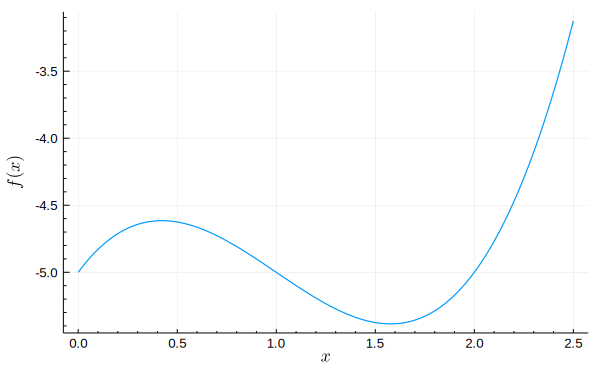

In [29]:
xlabel = L"x"
ylabel = L"f(x)"
plot(x_exact, y_exact, xlabel=xlabel, ylabel=ylabel)
# Plots.savefig("/Users/lyx/Downloads/1.svg")

Generate a set of data points to be interpolated in the cubic polynomial curve on a evenly spaced grid:

In [30]:
x_input = range(a, b, step=0.5);
y_input = f.(x_input);
k_input = df.(x_input);

Create an interpolation instance:

In [31]:
spl = CubicHermiteSplineInterpolation(x_input, y_input, k_input);

Perform the actual cubic Hermite spline interpolation:

In [32]:
x_interp = range(a, b, step=0.01);
y_interp = spl(x_interp);

Plotting input data points, exact solution, and the interpolated result in a single plot shows that the interpolation is exact for cubic polynomials.

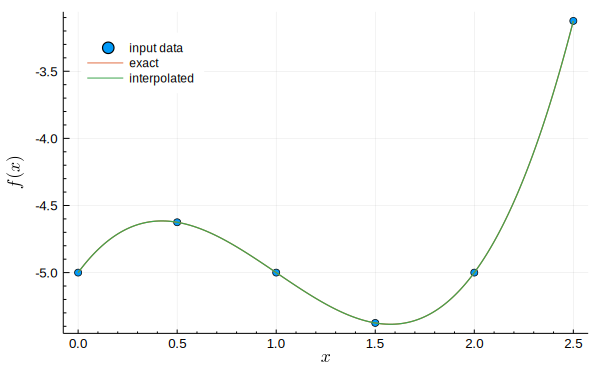

In [35]:
Plots.scatter(x_input, y_input, xlabel=xlabel, ylabel=ylabel, label="input data", legend=:topleft)
plot!(x_exact, y_exact, label="exact")
plot!(x_interp, y_interp, label="interpolated")
# Plots.savefig("/Users/lyx/Downloads/2.png")

Do the interpolation again for data points on an irregular grid.

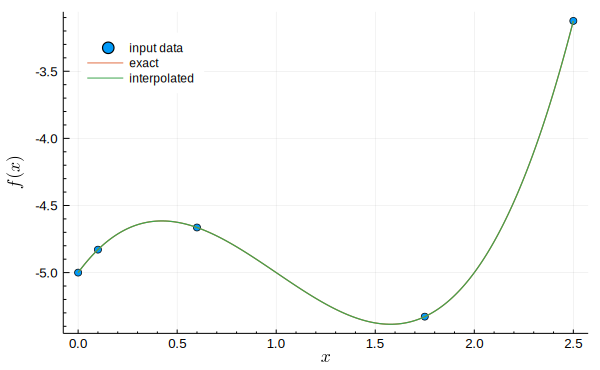

In [37]:
x_input = [a, 0.1, 0.6, 1.75, b];
y_input = f.(x_input);
k_input = df.(x_input);

spl = CubicHermiteSplineInterpolation(x_input, y_input, k_input);

x_interp = range(a, b, step=0.01);
y_interp = spl(x_interp);

Plots.scatter(x_input, y_input, xlabel=xlabel, ylabel=ylabel, label="input data", legend=:topleft)
plot!(x_exact, y_exact, label="exact")
plot!(x_interp, y_interp, label="interpolated")
# Plots.savefig("/Users/lyx/Downloads/3.png")

## Smooth functions

Here we use the [spherical bessel function of the first kind](https://mathworld.wolfram.com/SphericalBesselFunctionoftheFirstKind.html):
$$
    j_1(x) = \frac{\sin x - x\cos x}{x^2}.
$$

Below we show that the cubic Hermite spline performs impressively well for interpolating such smooth functions.

In [38]:
g(x) = (sin(x) - x*cos(x)) / x^2;

In [39]:
# dg(x) = ((x^2 - 2) * sin(x) + 2x*cos(x)) / x^3;
dg(x) = (sin(x) - 2*g(x)) / x;

In [40]:
a = 0.01
b = 8.01
x_exact = range(a, b, step=0.01);
y_exact = g.(x_exact);

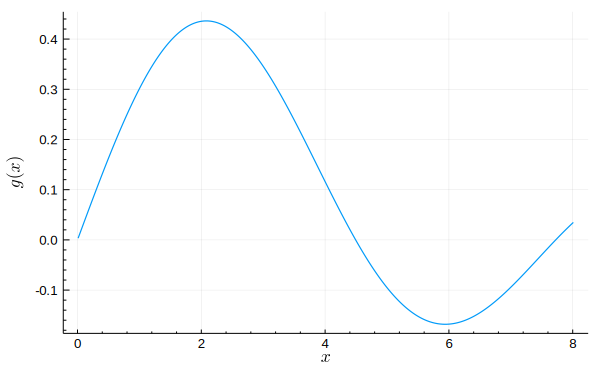

In [43]:
ylabel = L"g(x)"
plot(x_exact, y_exact, xlabel=xlabel, ylabel=ylabel)
# Plots.savefig("/Users/lyx/Downloads/4.png")

In [44]:
x_input = range(a, b, step=0.5);
y_input = g.(x_input);
k_input = dg.(x_input);

In [45]:
spl = CubicHermiteSplineInterpolation(x_input, y_input, k_input);

In [46]:
x_interp = range(a, b, step=0.01);
y_interp = spl(x_interp);

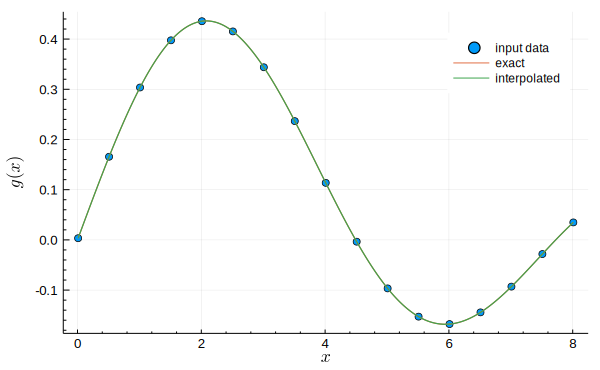

In [48]:
Plots.scatter(x_input, y_input, xlabel=xlabel, ylabel=ylabel, label="input data", legend=:topright)
plot!(x_exact, y_exact, label="exact")
plot!(x_interp, y_interp, label="interpolated")
# Plots.savefig("/Users/lyx/Downloads/5.png")

It can be seen from above plot that the interpolation works perfectly for known data points on a dense even grid.

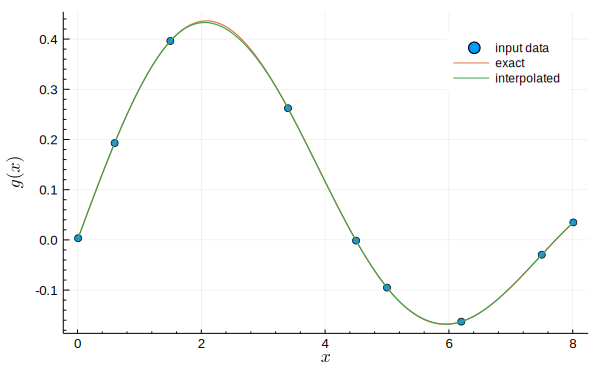

In [50]:
x_input = [a, 0.6, 1.5, 3.4, 4.5, 5.0, 6.2, 7.5, b];
y_input = g.(x_input);
k_input = dg.(x_input);

spl = CubicHermiteSplineInterpolation(x_input, y_input, k_input);

x_interp = range(a, b, step=0.01);
y_interp = spl(x_interp);

Plots.scatter(x_input, y_input, xlabel=xlabel, ylabel=ylabel, label="input data", legend=:topright)
plot!(x_exact, y_exact, label="exact")
plot!(x_interp, y_interp, label="interpolated")
# Plots.savefig("/Users/lyx/Downloads/6.png")

Note that the accuracy of the interpolation degrades near the extrema of the function if there is no input data point near that region. 